# Image similarity detector

## Application is helpful in validating the similarity of the images provided by user

In [3]:
# import all necessary packages
from skimage.metrics import structural_similarity
import imutils
from PIL import Image
import cv2
import requests

In [7]:
# Open images from web and display
original = Image.open(requests.get("https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg", stream=True).raw)
tampered = Image.open(requests.get("https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png", stream=True).raw)

In [12]:
# Print the format and sizes of the images
print("Original image format ", original.format)
print("Tampered image format ", tampered.format)

print("Size of original image ", original.size)
print("Size of the tampered image ", tampered.size)

Original image format  JPEG
Tampered image format  PNG
Size of original image  (1200, 800)
Size of the tampered image  (282, 179)


In [14]:
# Resize and save the images to same size
original = original.resize((250, 160))
original.save("./media/images/original.png")

tampered = tampered.resize((250, 160))
tampered.save("./media/images/tampered.png")

print("Size of original image ", original.size)
print("Size of tampered image ", tampered.size)


Size of original image  (250, 160)
Size of tampered image  (250, 160)


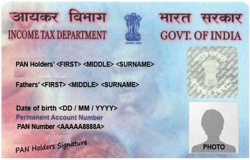

In [16]:
# Display the original image
original

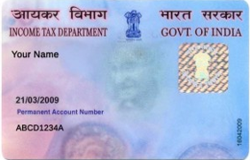

In [18]:
# Display the tampered image
tampered

In [20]:
# Read the images using OpenCV
original = cv2.imread("./media/images/original.png")
tampered = cv2.imread("./media/images/tampered.png")

#### Converting image into grayscale to identify the color edges of the images and it also helps in better understanding images by machine as colour images have 3 layers where as grayscale has 1.

In [28]:
# Convert the images into grayscale
original_bw = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_bw = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [30]:
# Calculate the structural similarity index between the two images
(score, diff) = structural_similarity(original_bw, tampered_bw, full=True)
diff = (diff * 255).astype("uint8")
print("Structural Similarity Index Score {}".format(score))

Structural Similarity Index Score 0.31678790332739426


In [32]:
# Calculate the threshold and contours
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

#### We calculate and draw bounding box of images to identify where the bounding images are similar or not

In [36]:
# loop over the contours
for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

Original image with contours


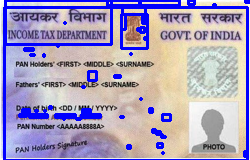

In [41]:
# Display the original image with contours
print("Original image with contours")
Image.fromarray(original)

Tampered image with contours


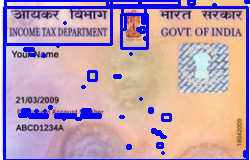

In [43]:
# Display the tampered image with contours
print("Tampered image with contours")
Image.fromarray(tampered)

Image difference with black


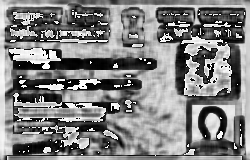

In [45]:
# Display image with the black
print("Image difference with black")
Image.fromarray(diff)

Image difference with white


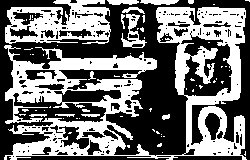

In [47]:
# Display image with the white
print("Image difference with white")
Image.fromarray(thresh)